In [273]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords')
import spacy
import plotly.express as px
import re
import text_hammer as th
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import requests

from nltk.corpus import stopwords
from collections import Counter

'''
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
'''


import os
from wordcloud import WordCloud
from PIL import Image


[nltk_data] Downloading package stopwords to C:\Users\Bipasha
[nltk_data]     Hambir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [275]:
# Importing train and test dataset
df=pd.read_csv(r"D:\covid 19\covid19_tweets.csv")


In [276]:
df.shape

(179108, 13)

In [277]:
# View the dataset
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [205]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [206]:
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [207]:
#sns.countplot(df['text'])

In [208]:
# Distribution of Sources
df['source'].value_counts().nlargest(5)

Twitter Web App        56891
Twitter for Android    40179
Twitter for iPhone     35472
TweetDeck               8543
Hootsuite Inc.          7321
Name: source, dtype: int64

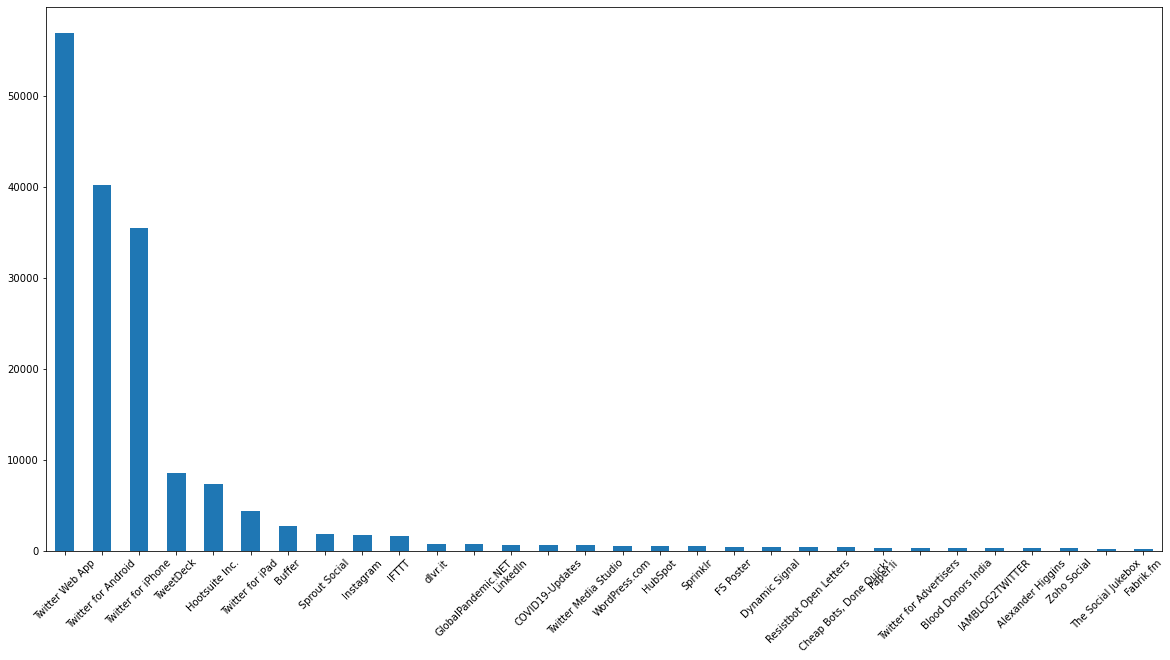

In [209]:
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='source'>

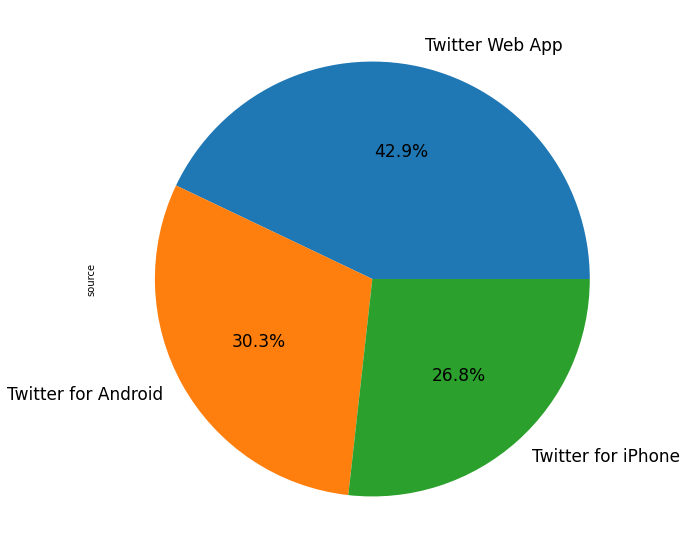

In [210]:
df_filter = df[(df["source"] == "Twitter for Android") | (df["source"] == "Twitter Web App") | (df["source"] == "Twitter for iPhone")]
df_filter["source"].value_counts().plot.pie(figsize=(20, 10), autopct='%1.1f%%', fontsize=17)

<AxesSubplot:ylabel='user_verified'>

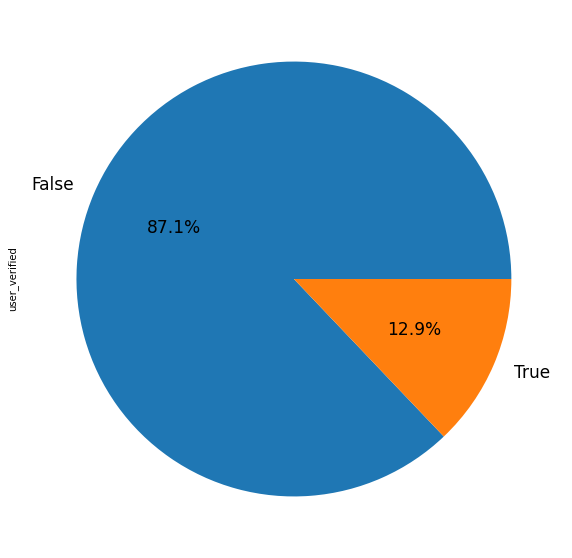

In [211]:
df["user_verified"].value_counts().plot.pie(figsize=(20, 10), autopct='%1.1f%%', fontsize=17)

<AxesSubplot:title={'center':'Top 100 locations tweet'}>

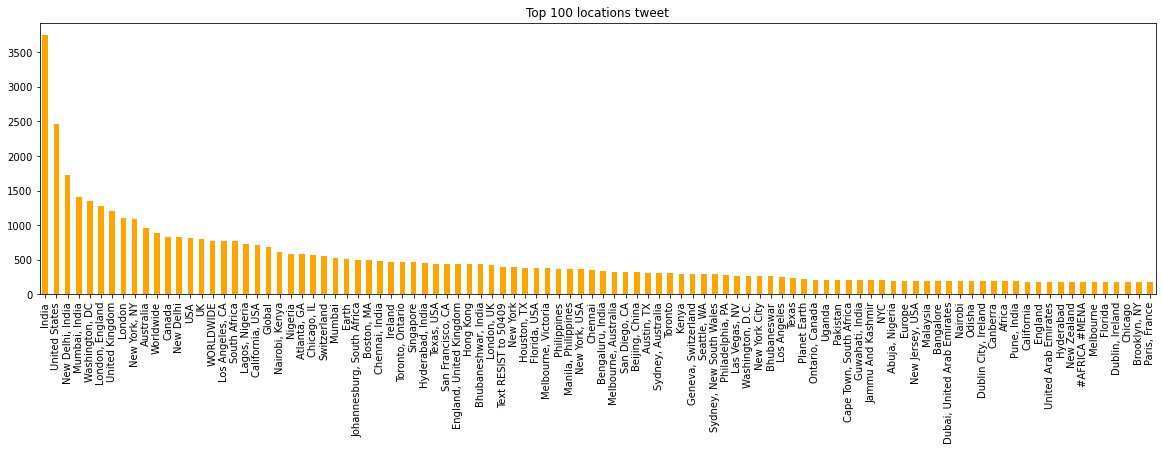

In [212]:
df["user_location"].value_counts().head(100).plot.bar(title="Top 100 locations tweet", figsize=(20, 5), color="orange")

Testing Benford's Law

In [278]:
def count_occur_numbers(dataframe):
    count_total = 0
    number_occur = {}
    for current in dataframe:
        for number in str(current):
            number = int(number)
            if number != 0:
                if number not in number_occur:
                    number_occur[number] = 0
                number_occur[number] += 1
                count_total = count_total + 1
    return number_occur

def number_probability(number_occur, total):
    probability = list()
    indexes = list()
    for index in number_occur:
        indexes.append(index[0])
        probability.append(round(index[1] / total, 4))
    return indexes, probability

In [279]:
def count_occur(dataframe):
    number_occur = count_occur_numbers(dataframe)
    total_sum = sum(number_occur.values())
    number_occur = sorted(number_occur.items(), key=lambda x: x[1], reverse=True)
    
    return number_occur, total_sum

user_followers = df['user_followers']
user_friends = df['user_friends']
user_favourites = df['user_favourites']

In [281]:
def distribution_plot(X, y, title, color):
    figure(figsize=(10, 8), dpi=80)
    plt.scatter(X, y)

    z = np.polyfit(X, y, 1)
    p = np.poly1d(z)
    
    plt.plot(X, p(X),"r--")
    plt.xticks(np.arange(len(X)))
    plt.title(f"Probability {title}")
    plt.xlabel("Number occur")
    plt.ylabel("Proba")
    plt.bar(X, y, color=color)

,number,probability %
0,1,17.53
1,2,13.51
2,3,11.93
3,4,10.77
4,5,10.24
5,6,9.77
6,7,9.25
7,8,8.71
8,9,8.30


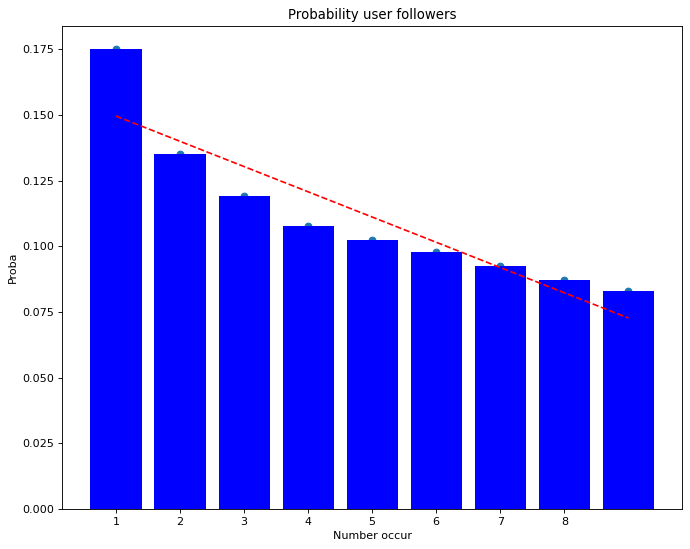

In [282]:
distribution_plot(X=indexes_user, y=probability_user, title='user followers', color='blue')
pd.DataFrame({'number': np.array(indexes_user), 'probability %': np.array(probability_user) * 100}).head(10)

,number,probability %
0,1,18.02
1,2,13.73
2,3,11.58
3,4,11.03
4,5,9.98
5,6,9.18
6,9,9.03
7,7,8.86
8,8,8.59


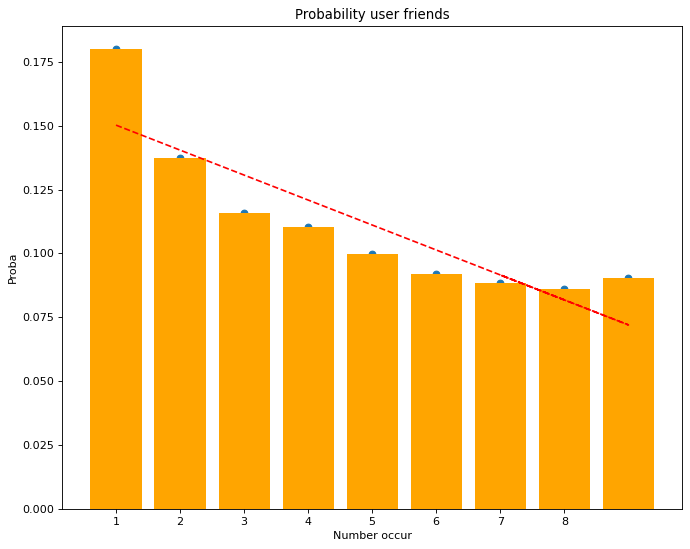

In [283]:
distribution_plot(X=indexes_friends, y=probability_friends, title='user friends', color='orange')
pd.DataFrame({'number': np.array(indexes_friends), 'probability %': np.array(probability_friends) * 100}).head(10)

,number,probability %
0,1,17.42
1,2,13.44
2,3,11.47
3,4,10.81
4,5,10.23
5,6,9.58
6,7,9.21
7,8,9.07
8,9,8.76


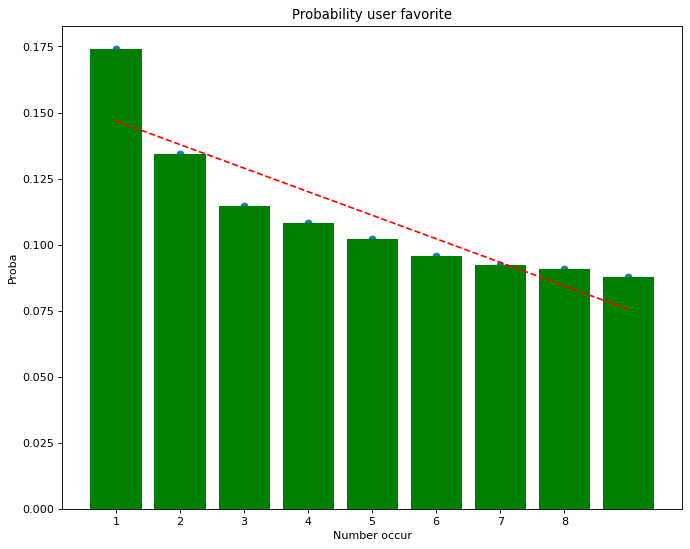

In [284]:
distribution_plot(X=indexes_favorite, y=probability_favorite, title='user favorite', color='green')
pd.DataFrame({'number': np.array(indexes_favorite), 'probability %': np.array(probability_favorite) * 100}).head(10)

In [285]:
India = ' '.join(text for text in df['text'][df['user_location'] == 'India'])
China = ' '.join(text for text in df['text'][df['user_location'] == 'China'])
USA = ' '.join(text for text in df['text'][df['user_location'] == 'USA'])
SA = ' '.join(text for text in df['text'][df['user_location'] == 'South Africa'])

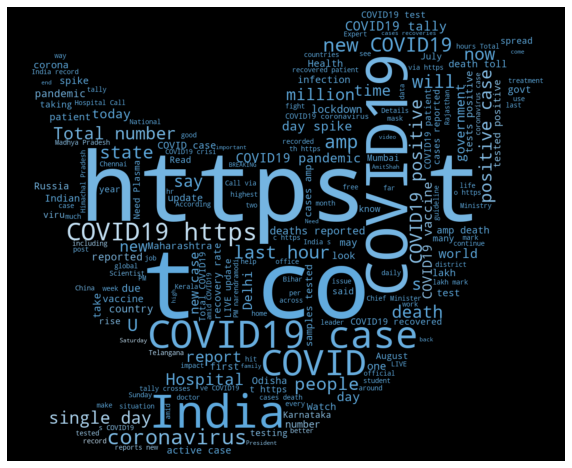

In [286]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(India)

# Size of the image generated 
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()

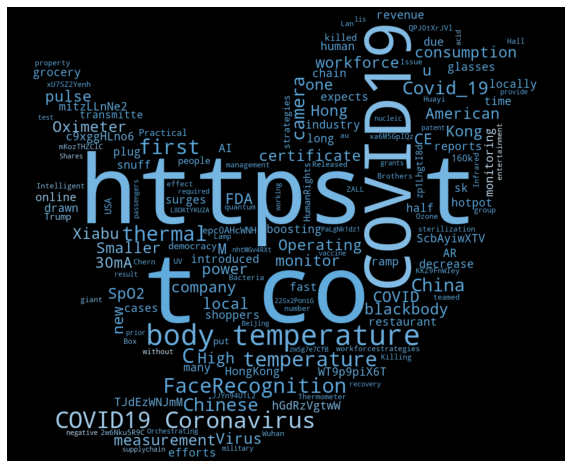

In [287]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(China)
plt.figure(figsize = (10, 20))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()

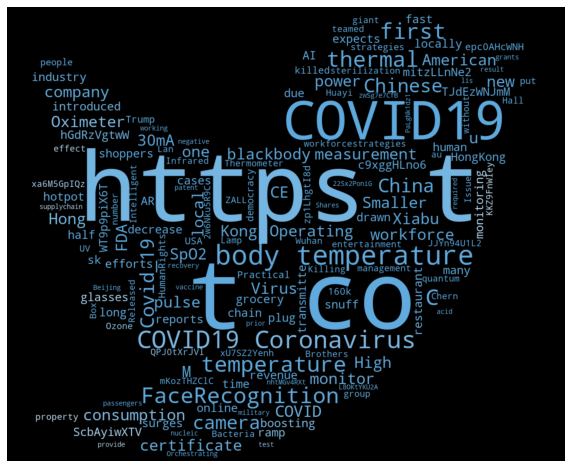

In [288]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(China)
plt.figure(figsize = (10, 20))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()

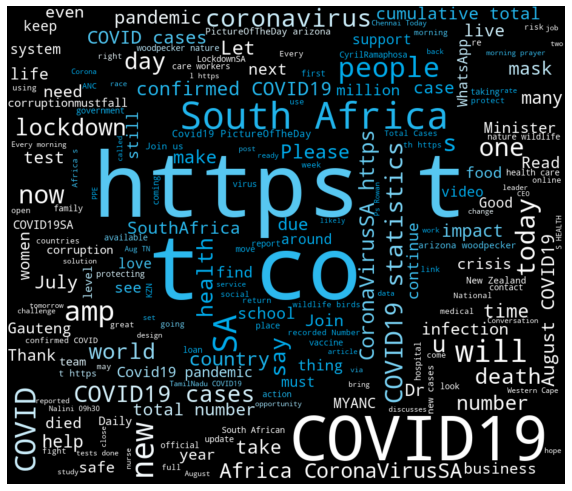

In [289]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/new_gallery/18-189677_instagram-logo-twitter-logo-bird-twitter-logo-2017.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color = 'black', height = 1500, width = 4000, mask = Mask).generate(SA)
plt.figure(figsize = (10, 20))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()


In [290]:
nlp = spacy.load("en_core_web_sm")

In [291]:
text=str(df['text'])

In [292]:
doc = nlp(text)

In [293]:
#Parts of Speech - pos
for token in doc:
    print(token.text, token.pos_)

0 NUM
         SPACE
If SCONJ
I PRON
smelled VERB
the DET
scent NOUN
of ADP
hand NOUN
sanitizers NOUN
toda NOUN
... PUNCT

 SPACE
1 NUM
         SPACE
Hey INTJ
@Yankees VERB
@YankeesPR PROPN
and CCONJ
@MLB PROPN
- PUNCT
would AUX
n't PART
it PRON
... PUNCT

 SPACE
2 NUM
         SPACE
@diane3443 X
@wdunlap NOUN
@realDonaldTrump ADP
Trump PROPN
nev PROPN
... PUNCT

 SPACE
3 NUM
         SPACE
@brookbanktv VERB
The DET
one NUM
gift NOUN
# SYM
COVID19 NOUN
has AUX
give VERB
me PRON
... PUNCT

 SPACE
4 NUM
         SPACE
25 NUM
July PROPN
: PUNCT
Media PROPN
Bulletin PROPN
on ADP
Novel PROPN
# X
CoronaVirus PROPN
... PUNCT

                                 SPACE
... PUNCT
                       
 SPACE
179103 NUM
    SPACE
Thanks NOUN
@IamOhmai PROPN
for ADP
nominating VERB
me PRON
for ADP
the DET
@WH PROPN
... PUNCT

 SPACE
179104 NUM
    SPACE
2020 NUM
! PUNCT
The DET
year NOUN
of ADP
insanity NOUN
! PUNCT
Lol PROPN
! PUNCT
# SYM
COVID19 ADJ
http X
... PUNCT

 SPACE
179105 NUM
    SPACE


In [294]:
spacy.displacy.render(doc,style='ent',jupyter=True)

In [295]:
for ent in doc.ents:
    if ent.label_ == 'PERSON':
        print(ent.text,ent.label_)

Lol PERSON
Juan Lucena PERSON
Length PERSON


Change the type of column

In [296]:
df.user_name = df.user_name.astype('category') 
df.user_name = df.user_name.cat.codes.astype(str)
df.date= pd.to_datetime (df.date).dt.date 
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,89755,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,76403,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,76147,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,84572,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,18398,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [297]:
remove_url= lambda x: re.sub(r"https\S+", "", str(x))
text_en_lr = df['text'].apply(remove_url)
text_en_lr.head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

In [298]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower()) 
text_en_lr_lc.head()

0    if i smelled the scent of hand sanitizers toda...
1    hey @yankees @yankeespr and @mlb - wouldn't it...
2    @diane3443 @wdunlap @realdonaldtrump trump nev...
3    @brookbanktv the one gift #covid19 has give me...
4    25 july : media bulletin on novel #coronavirus...
Name: text, dtype: object

In [299]:
import string

In [300]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation))) 
text_en_lr_lc_pr.head()

0    if i smelled the scent of hand sanitizers toda...
1    hey yankees yankeespr and mlb  wouldnt it have...
2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv the one gift covid19 has give me i...
4    25 july  media bulletin on novel coronavirusup...
Name: text, dtype: object

In [236]:
word_list= [word for line in text_en_lr_lc_pr for word in line.split()]
word_list[:5]

['if', 'i', 'smelled', 'the', 'scent']

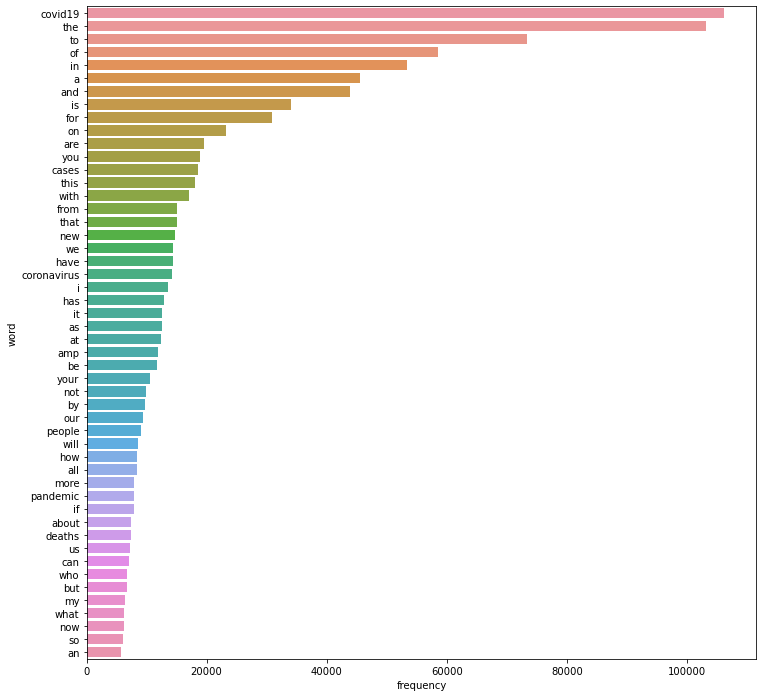

In [237]:
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize= (12, 12))

ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df) 
plt.savefig('wordcount_bar.png')

In [241]:
counts_df

,word,frequency
0,covid19,106202
1,the,103201
2,to,73410
3,of,58498
4,in,53388
5,a,45551
6,and,43810
7,is,34096
8,for,30876
9,on,23192


In [239]:
fig = px.treemap(counts_df, path=['word'], values='frequency',title='Tree Of Most Common Words')
fig.show()

In [302]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.figure_factory as ff
from collections import Counter

In [303]:
com = np.array(Image.open("D:\covid 19\yoga-gd9aad4396_1280.png"))

In [304]:
list= df['text'].tolist()
filtered_list = ("").join(list) #convert the list into a string of positive
filtered_list = filtered_list.lower()

In [305]:
wordcloud1 = WordCloud( max_words=200, min_font_size=20, margin=0, mask = com, 
                      background_color = "white").generate(filtered_list)

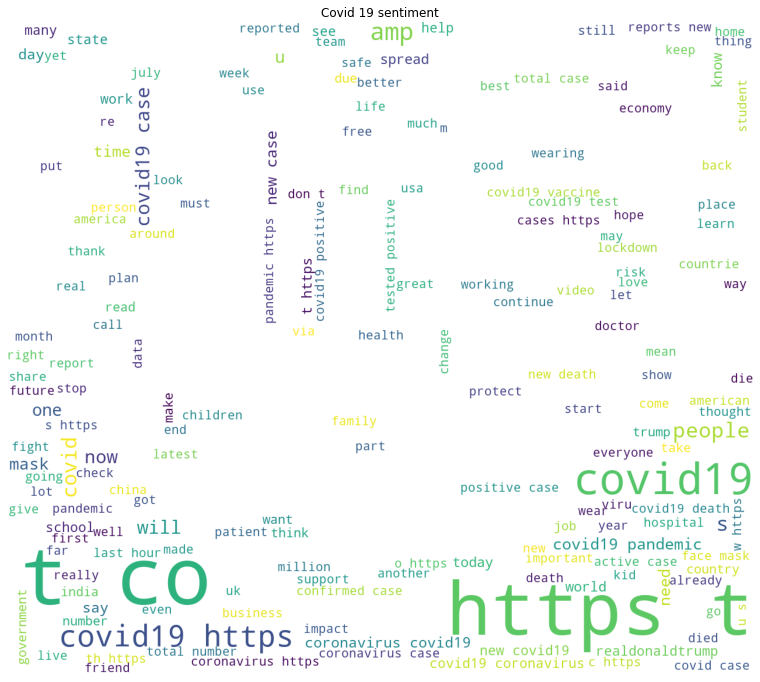

In [306]:
plt.figure(figsize=[15,12])
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("Covid 19 sentiment")
plt.show()

In [307]:

def wordcloud(df, feature):
    wordcloud = WordCloud(width = 1000,
                         height = 800,
                         colormap = 'Set3',
                         margin = 0,
                         max_words = 200,
                         min_word_length = 4,
                         max_font_size = 130, min_font_size = 15,
                         background_color ='gray').generate(str(df['text']))
    plt.figure(figsize = (20,15))
    plt.imshow(wordcloud)
    plt.title("Covid-19 twitter sentiment")
    plt.axis('off')

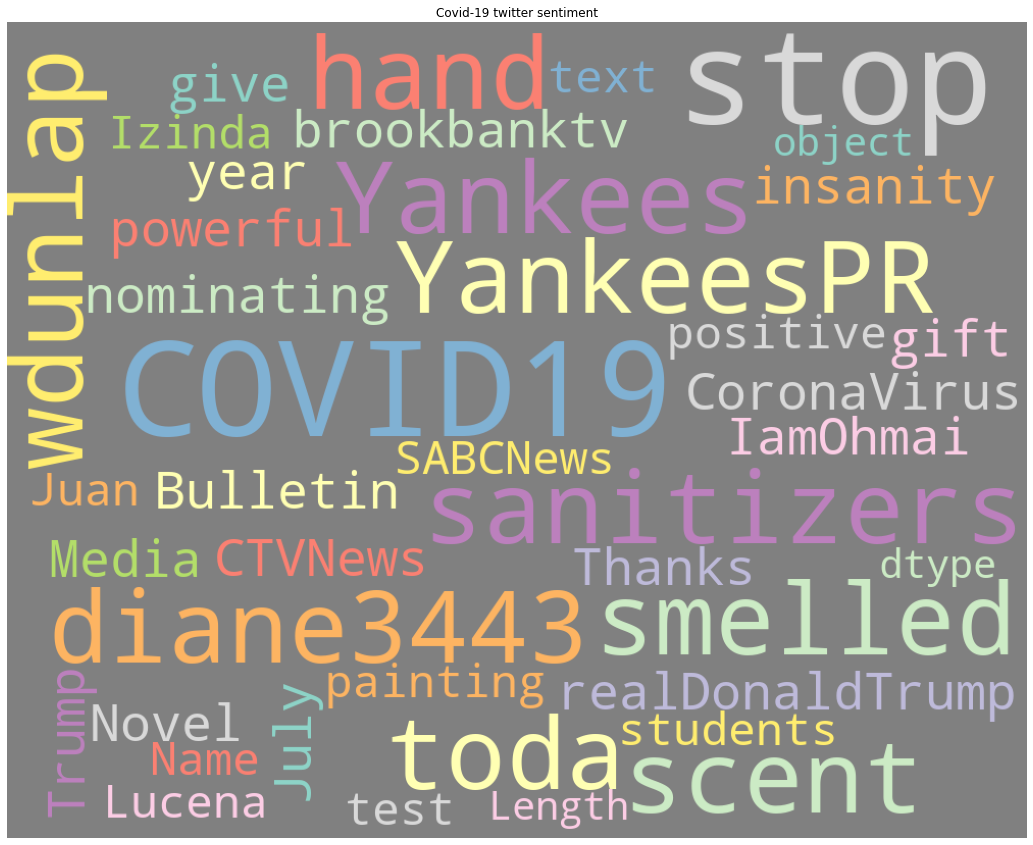

In [308]:
wordcloud(df,'user_name')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '29674'),
  Text(1, 0, '17372'),
  Text(2, 0, '84004'),
  Text(3, 0, '56559'),
  Text(4, 0, '10817'),
  Text(5, 0, '32328'),
  Text(6, 0, '33102'),
  Text(7, 0, '57648'),
  Text(8, 0, '33108'),
  Text(9, 0, '2169')])

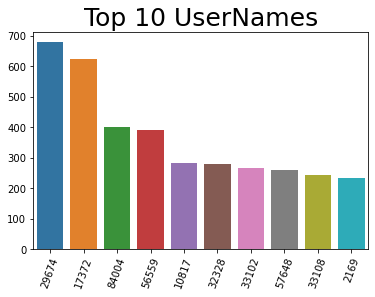

In [309]:
import seaborn as sns
user_count = df['user_name'].value_counts()
user_count = user_count[:10]
sns.barplot(x = user_count.index, y = user_count.values, data =df)
plt.title('Top 10 UserNames', fontsize = 25)
plt.xticks(rotation = 70)

In [310]:
from textblob import TextBlob

In [311]:
# Create a function to get to get the subjectivity and Polarity
def getSentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    result = {'polarity' : sentiment_polarity,
              'subjectivity' : sentiment_subjectivity,
              'sentiment': sentiment_label}
    return result

In [312]:
getSentiment(df['text'].iloc[0])

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [313]:
df['sentiment_results'] = df['text'].apply(getSentiment)
df['sentiment_results'].head()

0    {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1    {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3    {'polarity': 0.0, 'subjectivity': 0.3571428571...
4    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, dtype: object

In [314]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [315]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_results,polarity,subjectivity,sentiment
0,89755,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,76403,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,76147,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,84572,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,18398,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [316]:
df['sentiment'].value_counts()

Neutral     74862
Positive    74640
Negative    29606
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

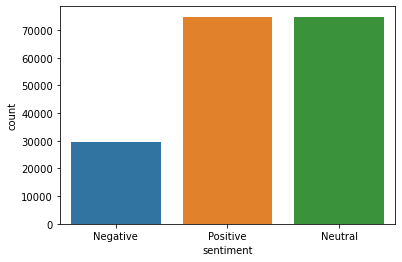

In [317]:
sns.countplot(df['sentiment'])

In [318]:
positive_tweets = df.query('sentiment == "Positive"')['text']
positive_tweets.shape

(74640,)

In [319]:
negative_tweets = df.query('sentiment == "Negative"')['text']
negative_tweets.shape

(29606,)

In [320]:
neutral_tweets = df.query('sentiment == "Neutral"')['text']
neutral_tweets.shape

(74862,)

In [321]:
# Create a function to remove stopwords and convert to tokens
def stop_token(df):
    df_list = df.apply(nfx.remove_stopwords).tolist()
    # Tokenization
    token = [token for line in df_list for token in line.split()]
    return token

In [322]:
positive_tokens = stop_token(positive_tweets)
negative_tokens = stop_token(negative_tweets)
neutral_tokens = stop_token(neutral_tweets)

In [323]:
from collections import Counter

def getTokenCount(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [324]:
most_common_positive_words = getTokenCount(positive_tokens)
most_common_negative_words = getTokenCount(negative_tokens)
most_common_neutral_words = getTokenCount(neutral_tokens)

In [325]:
def createDF(common_dict):
    return pd.DataFrame(common_dict.items(), columns=['words','count'])


In [326]:
positive_df = createDF(most_common_positive_words)
negative_df = createDF(most_common_negative_words)
neutral_df = createDF(most_common_neutral_words)

In [327]:
positive_df.head()

,words,count
0,#COVID19,28338
1,new,9855
2,cases,8872
3,&amp;,5338
4,-,4357


In [328]:
def plotCommonWords(df, sentiment=None):
    plt.figure(figsize=(20,10))
    sns.barplot(x='words', y='count', data = df)
    plt.title(f'Most common {sentiment} words', fontsize=20)
    plt.xticks(rotation=45)
    return plt.show()

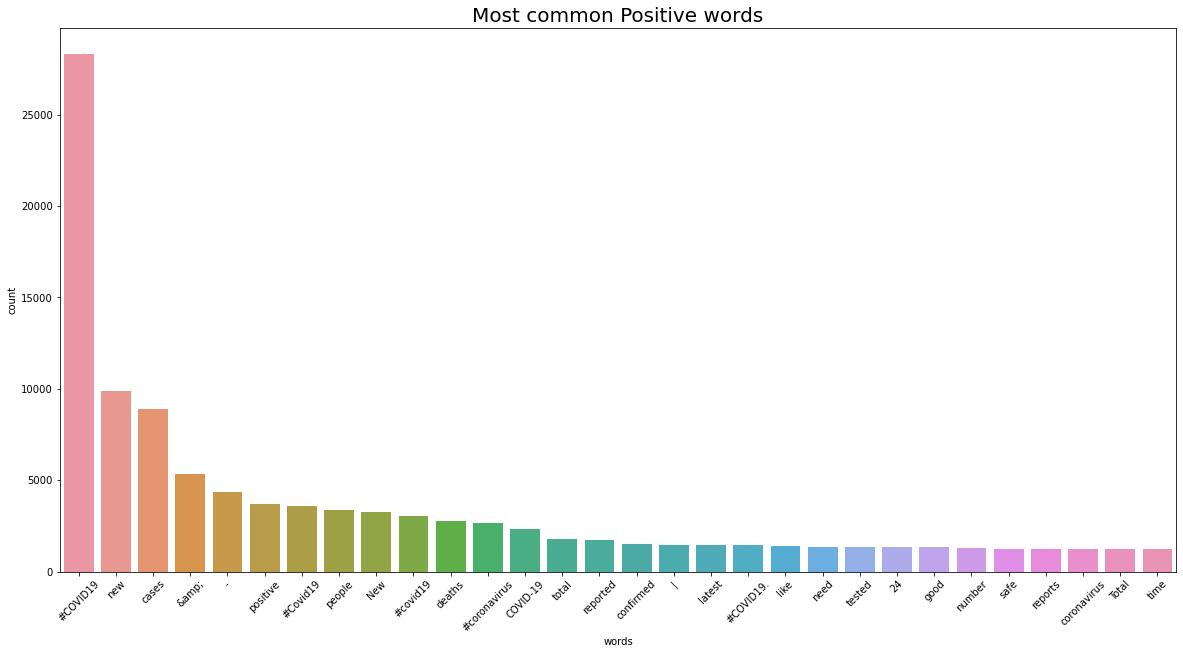

In [329]:
plotCommonWords(positive_df, 'Positive')

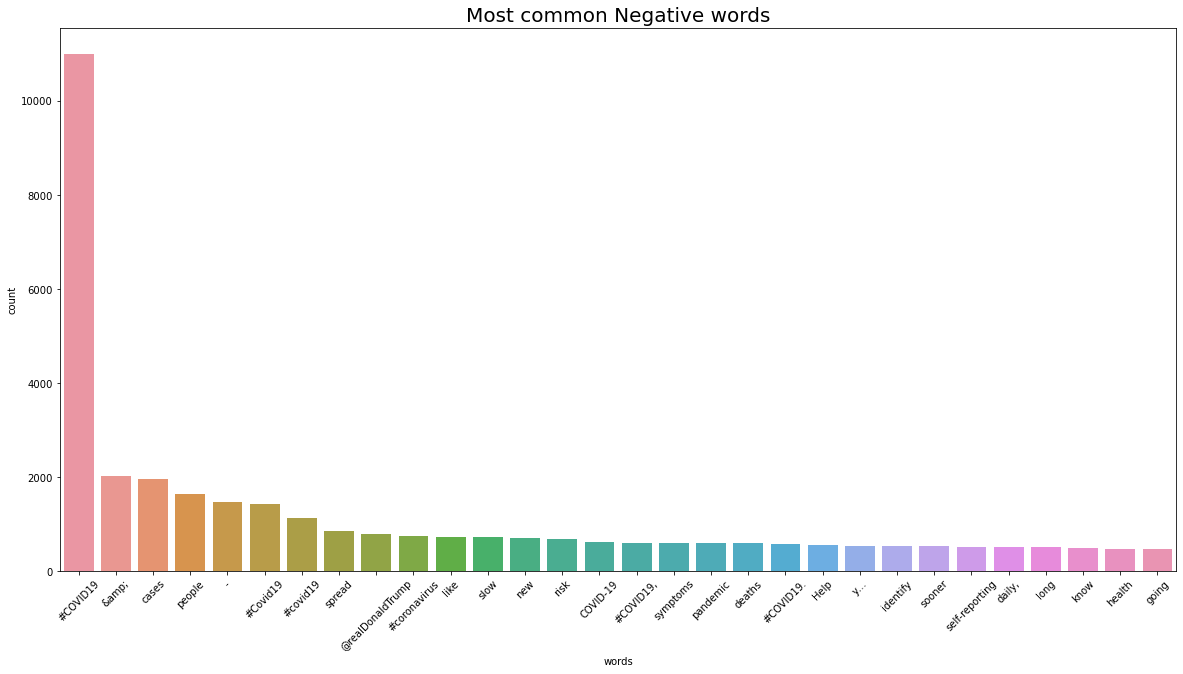

In [330]:
plotCommonWords(negative_df, 'Negative')

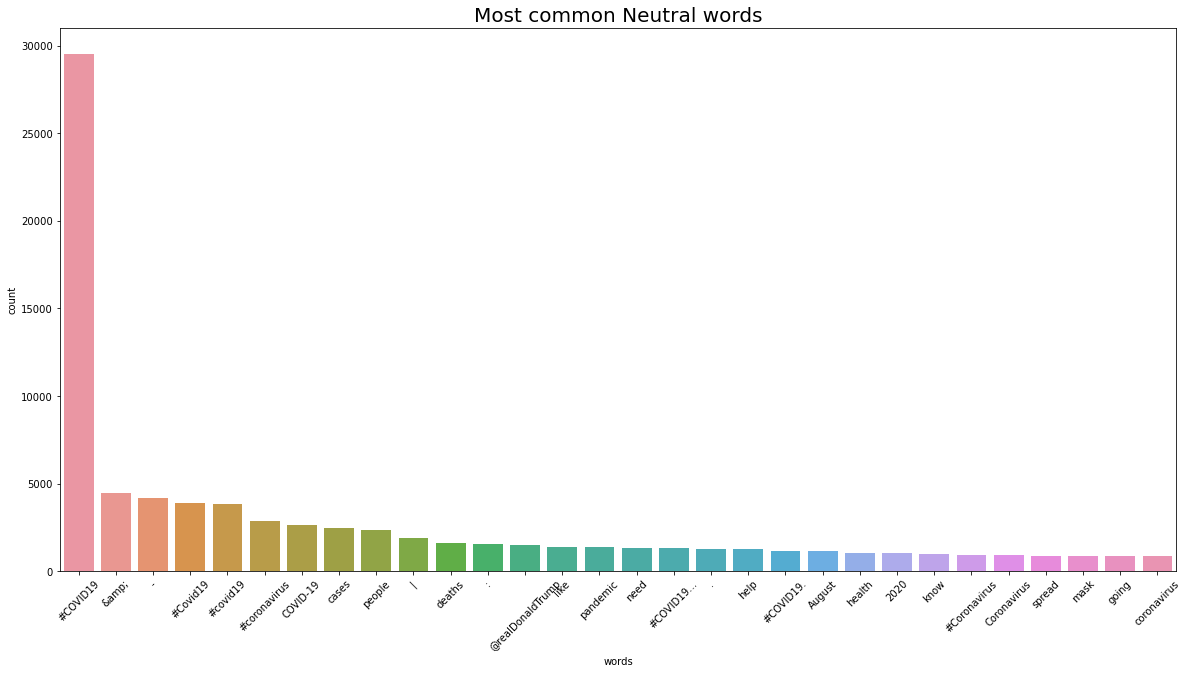

In [331]:
plotCommonWords(neutral_df, 'Neutral')